In [1]:
#Binary classification
#Multiclass classification
#Regression

In [ ]:
#Assignment:
#Adagrad
#ADAM
#SGD
#RMSProp
#Find the difference between these optimizers

In [2]:
#Binary classification -> Binary crossentropy
#Multiclass classification -> Categorical crossentropy
#Regression-> MSE

# 1. Example 1 - IMDB Movie database (Binary classification)

In [4]:
from keras.datasets import imdb
#train, test = imdb.load_data(num_words=10000)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #unpacking

17464789/17464789 [==============================] - 4s 0us/step


In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
imdb.get_word_index()

1641221/1641221 [==============================] - 2s 1us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [10]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preprocessing: cleaning/ transformation

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #25000 X 10000
    #sequences (0 - 25000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  #[0, [180,19999,89000]] = 1
    return results

In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
reverse_word_index.get(2)

'and'

In [19]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #binary classification so, activation function = sigmoid

In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [22]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
#train, validation, test

In [24]:
#Validation - Hyperparameters' selection - # of layers, #of neurons, #lr

In [25]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 174ms/step - loss: 0.5127 - accuracy: 0.7912 - val_loss: 0.3910 - val_accuracy: 0.8646
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3069 - accuracy: 0.9048 - val_loss: 0.3028 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2256 - accuracy: 0.9235 - val_loss: 0.2791 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1751 - accuracy: 0.9432 - val_loss: 0.2798 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1419 - accuracy: 0.9545 - val_loss: 0.2881 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1187 - accuracy: 0.9633 - val_loss: 0.2972 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0977 - accuracy: 0.9713 - val_loss: 0.3666 - val_accuracy: 0.8703
Epoch 8/20
3

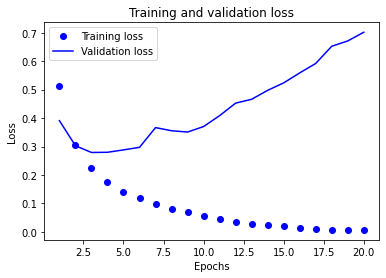

In [26]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

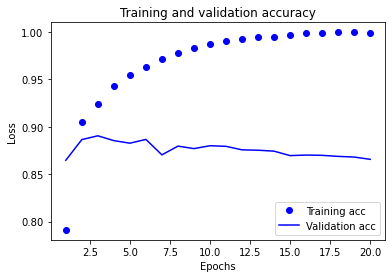

In [27]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
#Now let's do final training

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)



results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 18ms/step - loss: 0.4505 - accuracy: 0.8323
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2598 - accuracy: 0.9113
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1985 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2929 - accuracy: 0.8842


In [30]:
results

[0.29290616512298584, 0.8841599822044373]

In [31]:
x_test[0].shape

(10000,)

In [32]:
model.predict(x_test[0].reshape(1,10000))

1/1 [==============================] - 0s 148ms/step


array([[0.22882918]], dtype=float32)

In [33]:
' '.join([reverse_word_index.get(i-3, '?') for i in test_data[0]])

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

### Example 2 : Reuters data set (Multiclass classification)

In [34]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [35]:
train_data.shape

(8982,)

In [36]:
test_data.shape

(2246,)

In [37]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [40]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #For multiclass classification activation = softmax

In [41]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [42]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [43]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 2.7918 - accuracy: 0.4598 - val_loss: 1.8546 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.5084 - accuracy: 0.6917 - val_loss: 1.3592 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.1036 - accuracy: 0.7656 - val_loss: 1.1659 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8650 - accuracy: 0.8181 - val_loss: 1.0541 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.6886 - accuracy: 0.8561 - val_loss: 0.9956 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5490 - accuracy: 0.8877 - val_loss: 0.9156 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4433 - accuracy: 0.9121 - val_loss: 0.8728 - val_accuracy: 0.8260
Epoch 8/20
16

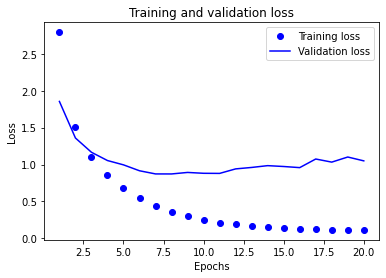

In [44]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

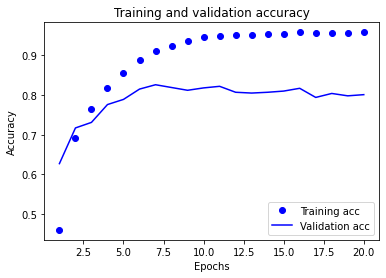

In [45]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 72ms/step - loss: 2.6121 - accuracy: 0.5443 - val_loss: 1.7311 - val_accuracy: 0.6500
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.4039 - accuracy: 0.7114 - val_loss: 1.3041 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0453 - accuracy: 0.7780 - val_loss: 1.1369 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8243 - accuracy: 0.8247 - val_loss: 1.0266 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6554 - accuracy: 0.8662 - val_loss: 0.9893 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5223 - accuracy: 0.8956 - val_loss: 0.9347 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 51ms/step - loss: 0.4201 - accuracy: 0.9142 - val_loss: 0.8903 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [47]:
results

[0.988330602645874, 0.7862867116928101]

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/3
16/16 [==============================] - 2s 63ms/step - loss: 2.5811 - accuracy: 0.5393 - val_loss: 1.6631 - val_accuracy: 0.6430
Epoch 2/3
16/16 [==============================] - 1s 48ms/step - loss: 1.3479 - accuracy: 0.7187 - val_loss: 1.2525 - val_accuracy: 0.7270
Epoch 3/3
71/71 [==============================] - 0s 3ms/step - loss: 1.1927 - accuracy: 0.7373


In [49]:
results

[1.1926621198654175, 0.7373107671737671]

In [50]:
#Using sparse categorical cross entropy

In [51]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [52]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])
model.fit(x_train,
y_train,
epochs=3,
batch_size=512)

Epoch 1/3
18/18 [==============================] - 2s 39ms/step - loss: 2.6417 - acc: 0.5412
Epoch 2/3
18/18 [==============================] - 1s 44ms/step - loss: 1.3886 - acc: 0.7111
Epoch 3/3
18/18 [==============================] - 1s 36ms/step - loss: 1.0010 - acc: 0.7882


In [53]:
#summarizing
#Multiclass classification
#One hot encoding -> Categorical cross entropy
#Normal categories -> Sparse categorical cross entropy

In [54]:
#Experimenting with networks of different sizes

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 3.1620 - accuracy: 0.3725 - val_loss: 2.6254 - val_accuracy: 0.4160
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 2.1227 - accuracy: 0.4469 - val_loss: 1.9594 - val_accuracy: 0.4540
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.5210 - accuracy: 0.6666 - val_loss: 1.5271 - val_accuracy: 0.6830
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1854 - accuracy: 0.7328 - val_loss: 1.4079 - val_accuracy: 0.6760
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0397 - accuracy: 0.7533 - val_loss: 1.3395 - val_accuracy: 0.6980
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9439 - accuracy: 0.7714 - val_loss: 1.3245 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.8672 - accuracy: 0.7821 - val_loss: 1.3538 - val_accuracy: 0.7170
Epoch 8/20
63

In [56]:
import keras
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=[keras.metrics.Precision(top_k=2)])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 25ms/step - loss: 1.7628 - precision: 0.3511 - val_loss: 1.1790 - val_precision: 0.4030
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9162 - precision: 0.4311 - val_loss: 1.0030 - val_precision: 0.4240
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 0.6072 - precision: 0.4621 - val_loss: 0.9002 - val_precision: 0.4390
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 0.4107 - precision: 0.4797 - val_loss: 0.8774 - val_precision: 0.4455
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2923 - precision: 0.4881 - val_loss: 0.8921 - val_precision: 0.4465
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.2318 - precision: 0.4917 - val_loss: 0.9358 - val_precision: 0.4465
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.1927 - precision: 0.4947 - val_loss: 0.9701 - val_precision: 0.4490

### Example 3: Boton Housing dataset (Regression)

In [58]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 5us/step


In [59]:
train_data.shape

(404, 13)

In [60]:
train_targets[0:11]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1])

In [61]:
#Normalizing
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [62]:
train_data[:11]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695],
       [-0.37502238, -0.483615

In [63]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #Since it is regression problem, last layer has no activation fuction
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [64]:
model = build_model()

In [65]:
history = model.fit(train_data,train_targets,epochs=20,batch_size=100)

Epoch 1/20
5/5 [==============================] - 1s 3ms/step - loss: 575.5090 - mae: 22.1578
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 531.6193 - mae: 21.1887
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 498.6239 - mae: 20.3907
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 464.3928 - mae: 19.5714
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 427.4487 - mae: 18.6564
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 393.5490 - mae: 17.7516
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 356.4602 - mae: 16.7409
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 320.6754 - mae: 15.7360
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 284.0714 - mae: 14.6594
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 245.1853 - mae: 13.4347
Epoch 11/20
5/5 [==============================] - 0s 4ms/s

In [66]:
#k-fold cross validation

In [67]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [ ]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)

    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
all_scores

In [ ]:
sum(all_scores)/4